In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import scipy.sparse as sp
import os

# Define misleading words
misleading_words = ["shocking", "hidden", "exposed", "warning", "secret"]

# Function to count misleading words in a headline
def count_misleading_words(text):
    return sum(1 for word in text.split() if word.lower() in misleading_words)

# Load your training data
current_path = os.getcwd()
data_path = os.path.join(current_path, 'dataset')
data_csv = os.path.join(data_path, 'training_data.csv')

df = pd.read_csv(data_csv, delimiter='\t', header=None, names=['label', 'headline'])
df['label'] = df['label'].astype(int)

# Add misleading word count as a feature
df['count_misleading_words'] = df['headline'].apply(count_misleading_words)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['headline', 'count_misleading_words']], df['label'], test_size=0.2, random_state=42
)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train['headline'])
X_test_vectorized = vectorizer.transform(X_test['headline'])

# Combine TF-IDF features with misleading word counts
X_train_combined = sp.hstack([X_train_vectorized, sp.csr_matrix(X_train['count_misleading_words'].values).T])
X_test_combined = sp.hstack([X_test_vectorized, sp.csr_matrix(X_test['count_misleading_words'].values).T])

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=1)
model.fit(X_train_combined, y_train)

# Evaluate the model
train_accuracy = model.score(X_train_combined, y_train)
test_accuracy = model.score(X_test_combined, y_test)
y_pred = model.predict(X_test_combined)

print("Random Forest Classifier Training Accuracy:", train_accuracy)
print("Random Forest Classifier Test Accuracy:", test_accuracy)
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model and vectorizer
joblib.dump(model, 'random_forest_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

Random Forest Classifier Training Accuracy: 0.997437868306431
Random Forest Classifier Test Accuracy: 0.9130434782608695

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3529
           1       0.91      0.91      0.91      3302

    accuracy                           0.91      6831
   macro avg       0.91      0.91      0.91      6831
weighted avg       0.91      0.91      0.91      6831



['tfidf_vectorizer.joblib']

  Using cached matplotlib-3.10.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.1 MB/s eta 0:00:00ta 0:00:01
Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.1.0-cp310-cp310-macosx_11_0_arm64.whl (3.1 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated 

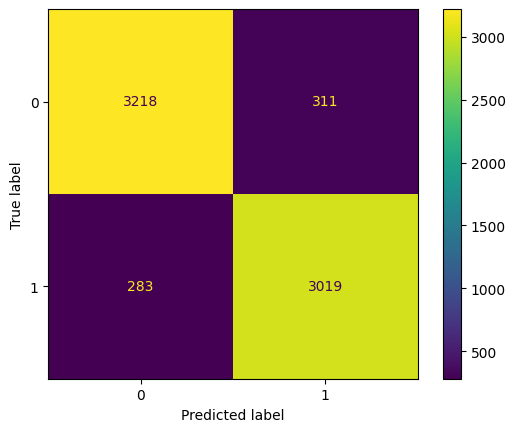

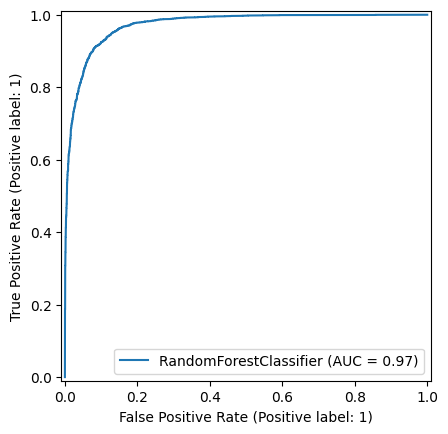

In [6]:
%pip install matplotlib

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test_combined, y_test)
RocCurveDisplay.from_estimator(model, X_test_combined, y_test)